## Core libraries
GitHub link- https://github.com/Sweety-gif-sys/Machine-Learning-Tutorial-

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Dataset

In [2]:
# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


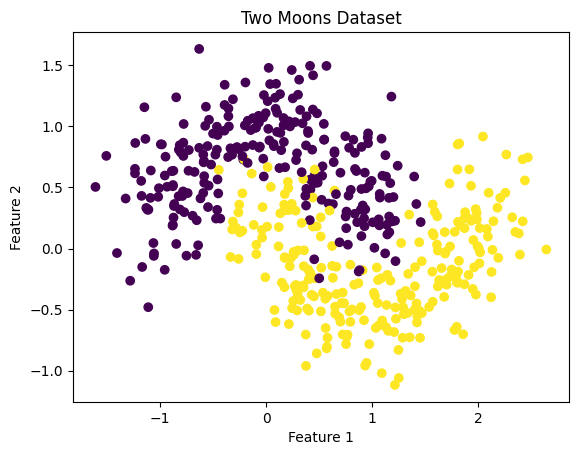

In [3]:
# Visualise dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Two Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Helper Function

In [4]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


## Linear SVM (Baseline)

Linear SVM Accuracy: 0.8533333333333334


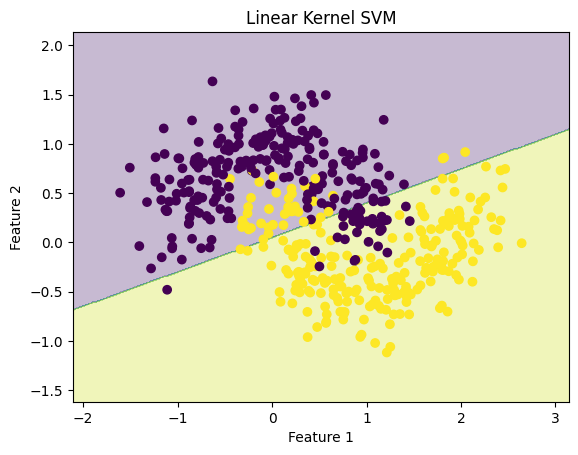

In [5]:
linear_svm = SVC(kernel="linear", C=1)
linear_svm.fit(X_train, y_train)

y_pred = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))

plot_decision_boundary(
    linear_svm, X, y, "Linear Kernel SVM"
)


## Polynomial Kernel

Polynomial Kernel Accuracy: 0.8666666666666667


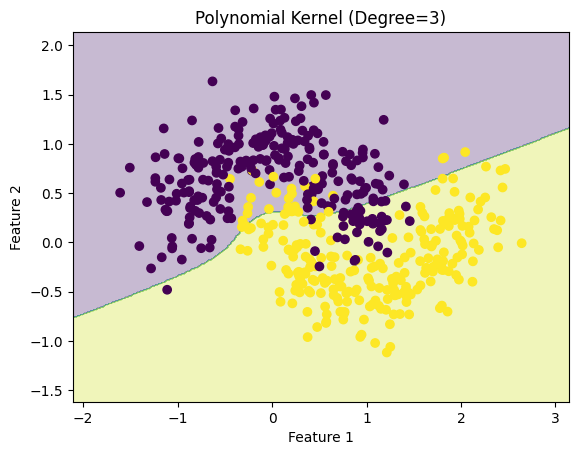

In [6]:
poly_svm = SVC(kernel="poly", degree=3, C=1)
poly_svm.fit(X_train, y_train)

y_pred = poly_svm.predict(X_test)
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred))

plot_decision_boundary(
    poly_svm, X, y, "Polynomial Kernel (Degree=3)"
)


## RBF Kernel

RBF Kernel Accuracy: 0.96


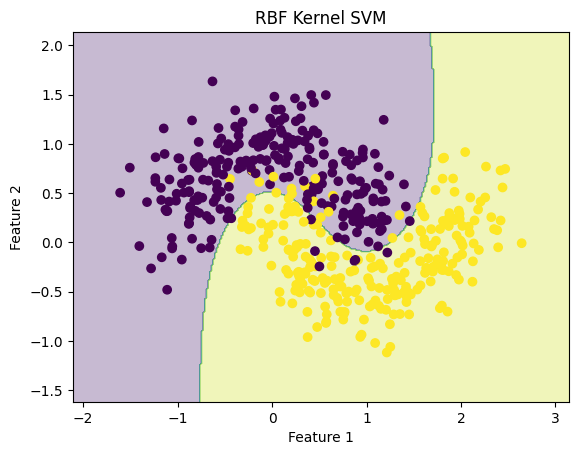

In [7]:
rbf_svm = SVC(kernel="rbf", gamma="scale", C=1)
rbf_svm.fit(X_train, y_train)

y_pred = rbf_svm.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred))

plot_decision_boundary(
    rbf_svm, X, y, "RBF Kernel SVM"
)


## Hyperparameter Comparison

In [8]:
C_values = [0.1, 1, 10]
for C in C_values:
    model = SVC(kernel="rbf", C=C)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"C={C}, Accuracy={acc:.3f}")


C=0.1, Accuracy=0.913
C=1, Accuracy=0.960
C=10, Accuracy=0.967
